Low Training and Cross-Validation Scores: Indicates underfitting. <br>
High Training Score, Low Cross-Validation Score: Suggests overfitting. <br>
Both Scores High and Converging: Suggests a well-fitted model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit 
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the dataset
digits = load_digits()
x, y = digits.data, digits.target

In [3]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [6]:
y.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [7]:
# Create a decision tree classifier
model = DecisionTreeClassifier()

In [8]:
# Set up the learning curve parameters
cv = ShuffleSplit(n_splits=100, random_state=42)

In [9]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, x, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

#model: The machine learning model you're using (e.g., an instance of a classifier or regressor).
#x: The input features.
#y: The target labels.
#cv: The cross-validation splitting strategy (e.g., the number of folds for cross-validation).
#scoring: The performance metric to evaluate (e.g., 'accuracy' for classification tasks).
#train_sizes: An array of different sizes of the training set, expressed as a fraction of the maximum size.
#The np.linspace(0.1, 1.0, 10) function call is used to generate an array of linearly spaced values. In this context, it is employed to create a sequence of training set sizes that are used in the learning_curve function. Here's a breakdown of its components:

#0.1: This is the start value of the sequence, representing 10% of the maximum training set size.
#1.0: This is the end value of the sequence, representing 100% of the maximum training set size.
#10: This is the number of values to generate between the start and end values, inclusive.

In [13]:
#train_sizes=np.linspace(0.1, 1.0, 10)
#train_sizes

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [15]:
#train_scores

In [16]:
# Calculate mean and standard deviation across folds
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [17]:
train_scores_mean

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
test_scores_mean

array([0.67066667, 0.74805556, 0.78661111, 0.80911111, 0.82527778,
       0.83966667, 0.84633333, 0.84788889, 0.85211111, 0.85805556])

# Plot the learning curve

Low Training and Cross-Validation Scores: Indicates underfitting. <br>
High Training Score, Low Cross-Validation Score: Suggests overfitting. <br>
Both Scores High and Converging: Suggests a well-fitted model.

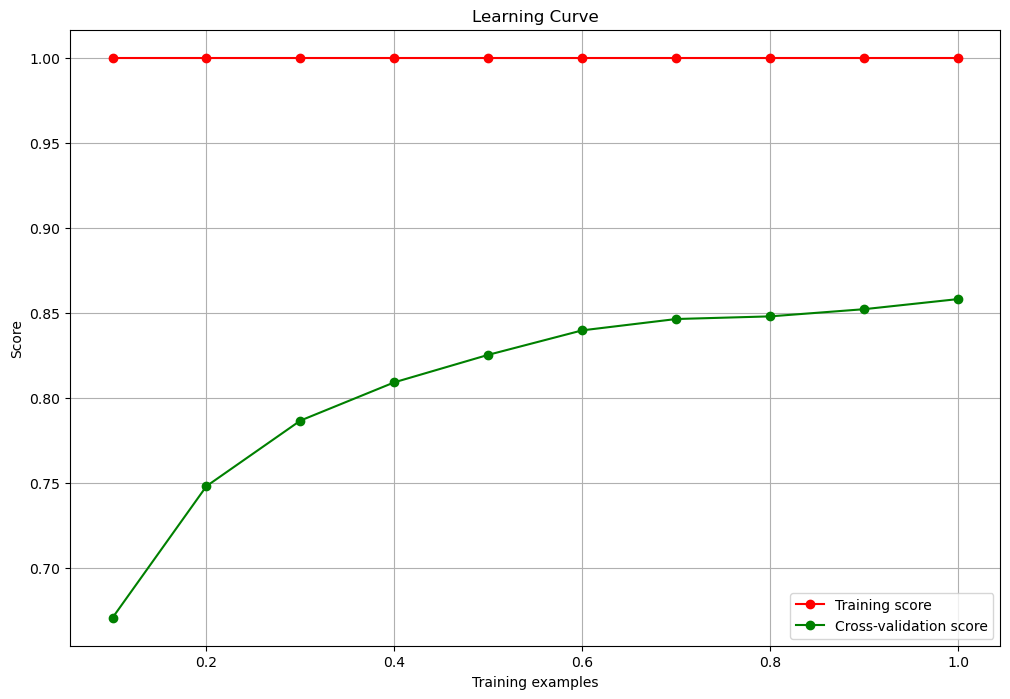

In [19]:
plt.figure(figsize=(12,8))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Customize the plot
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()